## VGG16 - Cat and Dog (CNN) Model
***Created by: Engg. Muhammad Saleem Raza***

In [1]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3)
                 )

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'E:/Downloads/datasets/vgg16_cat_dog/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20

def extract_features(directory, sample_count):
    
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    n = sample_count // batch_size
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        print(f'{i} / {n} Features extracting')
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

print('Extracting Train Features')
train_features, train_labels = extract_features(train_dir, 2000)
print('Extracting Validation Features')
validation_features, validation_labels = extract_features(validation_dir, 1000)
print('Extracting Test Features')
test_features, test_labels = extract_features(test_dir, 1000)

Extracting Train Features
Found 1200 images belonging to 2 classes.
1 / 100 Features extracting
2 / 100 Features extracting
3 / 100 Features extracting
4 / 100 Features extracting
5 / 100 Features extracting
6 / 100 Features extracting
7 / 100 Features extracting
8 / 100 Features extracting
9 / 100 Features extracting
10 / 100 Features extracting
11 / 100 Features extracting
12 / 100 Features extracting
13 / 100 Features extracting
14 / 100 Features extracting
15 / 100 Features extracting
16 / 100 Features extracting
17 / 100 Features extracting
18 / 100 Features extracting
19 / 100 Features extracting
20 / 100 Features extracting
21 / 100 Features extracting
22 / 100 Features extracting
23 / 100 Features extracting
24 / 100 Features extracting
25 / 100 Features extracting
26 / 100 Features extracting
27 / 100 Features extracting
28 / 100 Features extracting
29 / 100 Features extracting
30 / 100 Features extracting
31 / 100 Features extracting
32 / 100 Features extracting
33 / 100 Feat

In [6]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, 
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4248 - acc: 0.8010 - val_loss: 0.4002 - val_acc: 0.8320
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.2544 - acc: 0.8955 - val_loss: 0.3714 - val_acc: 0.8530
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.1873 - acc: 0.9370 - val_loss: 0.3766 - val_acc: 0.8510
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.1472 - acc: 0.9510 - val_loss: 0.4091 - val_acc: 0.8350
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1241 - acc: 0.9585 - val_loss: 0.4151 - val_acc: 0.8450
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.0940 - acc: 0.9705 - val_loss: 0.4268 - val_acc: 0.8490
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.0761 - acc: 0.9780 - val_loss: 0.4248 - val_acc: 0.8540


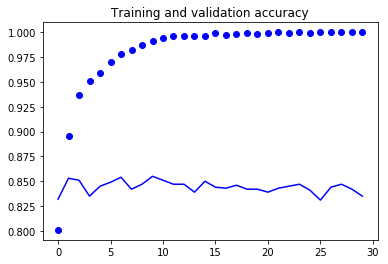

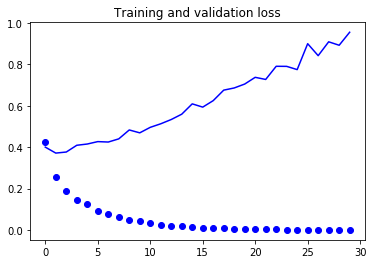

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

plt.show()

In [16]:
ev = model.evaluate(test_features, test_labels)
print('loss:', ev[0], 'acc:', ev[1])

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss: 1.0167651565372944 acc: 0.828


In [17]:
model.save('VGG16_p1_model_1.h5')